In [138]:
import sys

print(sys.version)

3.12.1 (main, Sep 30 2024, 17:05:21) [GCC 9.4.0]



(Introduction to Aerospace Flight Vehicles Copyright © 2022–2024 by J. Gordon Leishman is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License)

https://eaglepubs.erau.edu/introductiontoaerospaceflightvehicles/chapter/takeoff-landing-performance/

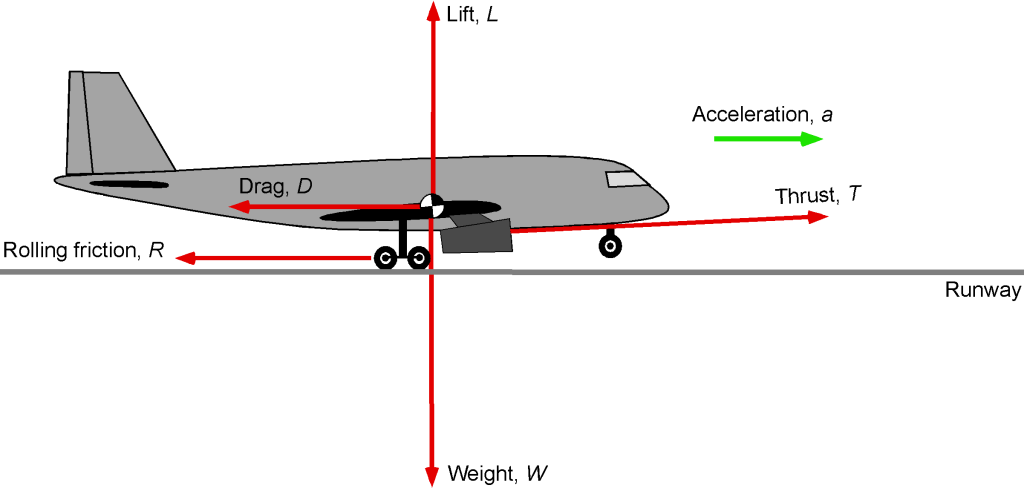

Eq. 1:
$$
R = \mu_r(W-L)
$$



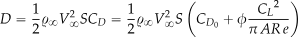

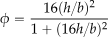

Net accelerating force on the airplane from Eq 5:
$$
T - R - D = T - \mu_r(W - L) - D = F
$$

Next I will break Eq 5 in terms of accelerations in X and Y.

It turns out that Eq. 5 is the forces along the axis of the plane, so basically 1 dimension (x)

Actually, I guess it assumes a reference frame fixed to the plane, along the plane's axis. And forces are acting on the point mass.

The forces transverse to the plane are: 

$$
L - W = F_{transverse}
$$

I'll model the forces relative to the point mass where positive x is forward of the plane along its direction of travel and positive y is perpedicular along the direction of lift.

$$
\ddot{p_{axial}} = (T - R - D)/m
$$

$$
\ddot{p_{transverse}} = (L - W)/m
$$

In [139]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt


from scipy.integrate import solve_ivp   # Now preferred to odeint

global constants
constants = {
    'g': 9.81, # m/s^2
    'm': 377842.4, # kg - https://www.researchgate.net/figure/General-specifications-of-the-BOEING-747-200-aircraft-1_tbl4_349651022
    'mu': 0.02, # TODO: find this value
    'a': 510.97, # m^2 - https://aerospaceweb.org/question/aerodynamics/q0252.shtml
    'rho': 1.2250, # kg/m^3 - assumes sea level - https://www.eoas.ubc.ca/courses/atsc113/flying/met_concepts/02-met_concepts/02a-std_atmos-P/index.html
    'Cl': 1 # TODO: find this value
}

# Define the initial conditions

x_pos_0 = 0.0
y_pos_0 = 0.0


# Define error tolerances for the solver
abserr = 1.0e-8
relerr = 1.0e-6


# Define the function that represents the right-hand side of the ODE
def f_a_axial(pos_y, W, L):
    ''' Axial force '''

    # Todo: Calculate these values
    T = 1.0
    R = constants['mu'] * (W - L) if pos_y == 0 else 0
    D = 0.2
    m = 1.0

    return (T - R - D)/m

def f_a_transverse(pos_y, vx):

    # Todo: Calculate these values
    L = constants['Cl'] * constants['a'] * .5 * constants['rho'] * vx^2
    W = 0.2
    Fn = W if pos_y <= 0 else 0
    m = 1.0

    return (L - W + Fn)/m

def equations_of_motion(t, y):
    # for ease of variable naming, pos_x is axial and pos_y is transverse

    pos_x, pos_y, vx, vy = y

    dxdt = vx
    dydt = vy
    dvxdt = f_a_axial(pos_y, W, L)
    dvydt = f_a_transverse(pos_y, vx)

    return [dxdt, dydt, dvxdt, dvydt]

def constraints(t, y):
    pos_x, pos_y, vx, vy = y

    return [pos_x - x_pos_0, pos_y - y_pos_0]

In [140]:
# Define the time points for which the solution is to be computed
duration_s = 30
t_span = (0, duration_s)
calc_hz = 1000
t_eval = np.linspace(0, duration_s, duration_s*calc_hz)

# Define the initial conditions
initial_conditions = [x_pos_0, y_pos_0, 0, 0]  # Assuming initial velocities are zero

# Solve the ODE
solution = solve_ivp(equations_of_motion, t_span, initial_conditions, t_eval=t_eval, atol=abserr, rtol=relerr)

# Extract the results
x = solution.y[0]
y = solution.y[1]


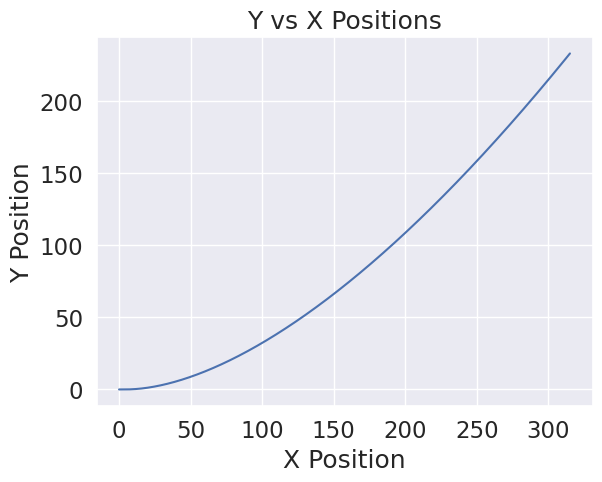

In [141]:
plt.figure()
plt.plot(x, y)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Y vs X Positions')
plt.grid(True)
plt.show()

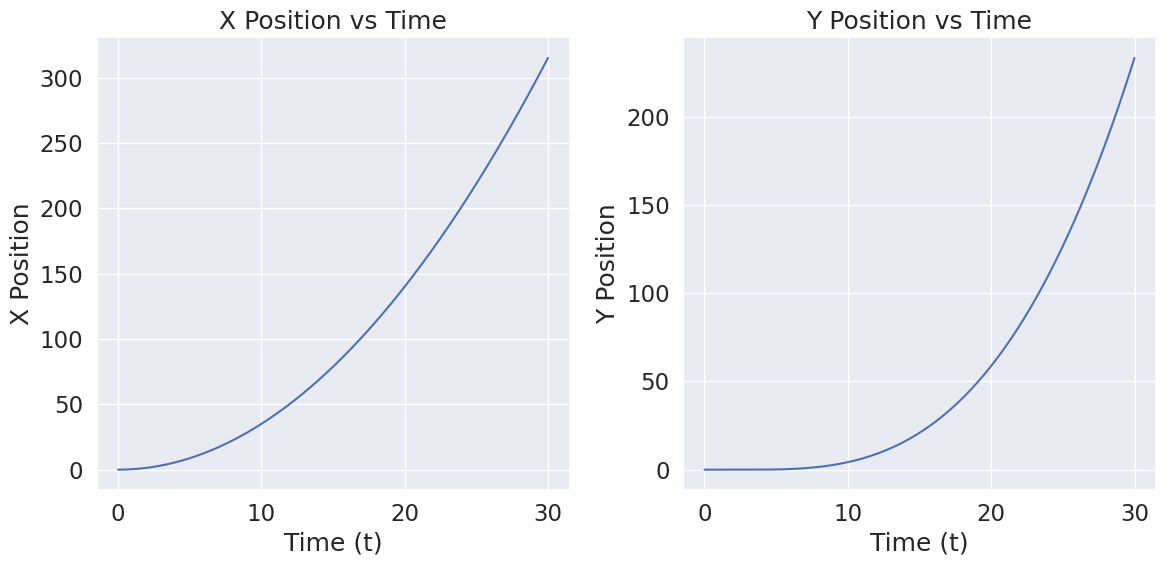

In [142]:
plt.figure(figsize=(12, 6))

# Plot x vs t
plt.subplot(1, 2, 1)
plt.plot(t_eval, x)
plt.xlabel('Time (t)')
plt.ylabel('X Position')
plt.title('X Position vs Time')
plt.grid(True)

# Plot y vs t
plt.subplot(1, 2, 2)
plt.plot(t_eval, y)
plt.xlabel('Time (t)')
plt.ylabel('Y Position')
plt.title('Y Position vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

In [143]:
import pandas as pd
df = pd.DataFrame({'time': t_eval, 'x': x, 'y': y})

print(df)

         time             x             y
0       0.000  0.000000e+00  0.000000e+00
1       0.001  3.500233e-07 -4.134992e-10
2       0.002  1.400093e-06 -7.589699e-10
3       0.003  3.150210e-06 -9.644265e-10
4       0.004  5.600373e-06 -9.598622e-10
...       ...           ...           ...
29995  29.996  3.149160e+02  2.331963e+02
29996  29.997  3.149370e+02  2.332221e+02
29997  29.998  3.149580e+02  2.332478e+02
29998  29.999  3.149790e+02  2.332736e+02
29999  30.000  3.150000e+02  2.332994e+02

[30000 rows x 3 columns]


In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation
from IPython.display import HTML


# create background figure and axes
sns.set_theme(font_scale=1.5)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim((df['x'].min(), df['x'].max()))
ax.set_ylim((df['y'].min(), df['y'].max()))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Y vs X')


# don't show the plain background
plt.close()


In [145]:
def drawframe(anim_frame, num_anim_frames):
    data_frame = floor(anim_frame/num_anim_frames*len(df['time']))

    ax.clear()
    ax.set_xlim((df['x'].min(), df['x'].max()))
    ax.set_ylim((df['y'].min(), df['y'].max()))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Y vs X')
    
    # Plot the trace up to the current frame
    ax.plot(df['x'][:data_frame], df['y'][:data_frame], marker='o')
    
    return ax.lines

In [146]:
# create animiation object and render in HTML video

anim_hz = 1
num_anim_frames = duration_s * anim_hz

from functools import partial
from math import floor

anim = animation.FuncAnimation(fig, partial(drawframe, num_anim_frames=num_anim_frames), frames=num_anim_frames, interval=1/anim_hz*10**3, blit=True)
#HTML(anim.to_html5_video())
HTML(anim.to_jshtml())